# Kernel Density Estimation

Earlier in this [section](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Figures%2C%20Axes%2C%20and%20Subplots.ipynb), you saw an example of [kernel density estimation ](https://en.wikipedia.org/wiki/Kernel_density_estimation)(KDE) through the use of seaborn's **distplot** function, which plots a KDE on top of a histogram.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


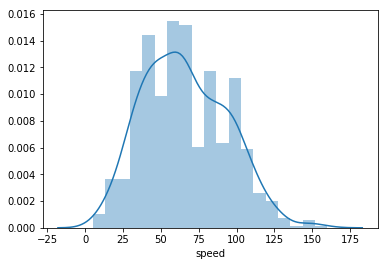

In [3]:
sb.distplot(df.speed)

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, **kdeplot**, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, **rugplot**. In a **rugplot**, data points are depicted as dashes on a number line.

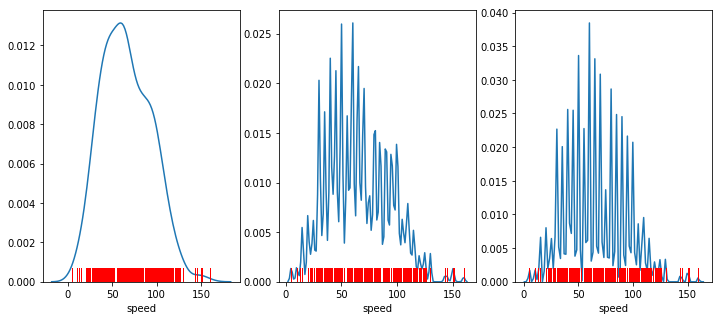

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
# left plot: showing kde lumps with the default settings
sb.distplot(df.speed,hist=False,rug=True ,rug_kws={'color':'r'})


plt.subplot(1,3,2)

# central plot: kde with narrow bandwidth to show individual probability lumps
sb.distplot(df.speed,hist=False,rug=True ,rug_kws={'color':'r'},kde_kws={'bw':1})

plt.subplot(1,3,3)

# right plot: choosing a different, triangular kernel function (lump shape)
sb.distplot(df.speed, rug=True , hist=False,rug_kws={'color':'r'} , kde_kws={'bw':1.5 ,'kernel':'tri'})

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.
